# Customer Segmentation using K-Means Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# About Dataset

## Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis. I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

This is about a supermarket mall and through membership cards , they have some basic data about customers like Customer ID, age, gender, annual income and spending score.Spending Score is something assigned to the customer based on defined parameters like customer behavior and purchasing data.

## Problem Statement

The business wants to understand the customers like who can be easily converted [Target Customers] so that the data can be given to marketing team and plan the strategy accordingly.



In [4]:

customer_data.drop('Gender', axis=1, inplace=True)


In [5]:
customer_data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [6]:
features = ['Age', 'Annual Income (k$)'] 
X = customer_data[features]

In [7]:
features

['Age', 'Annual Income (k$)']

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Aditya Dabrase\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aditya Dabrase\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Dabrase\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Dabrase\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Aditya Dabrase\anaconda3\Lib\subprocess.py", line 1538, in _execute_c

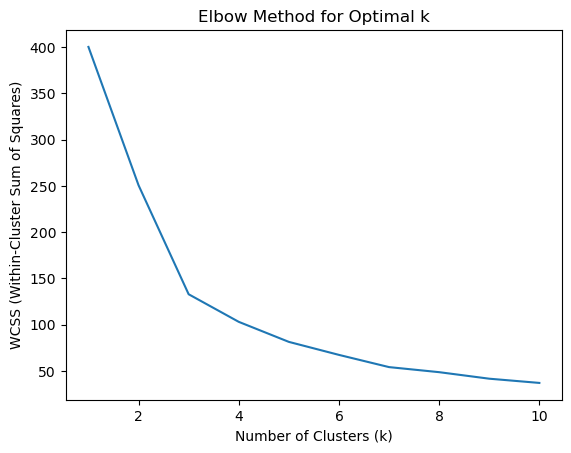

In [10]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [11]:
# Choose the optimal number of clusters and perform k-means clustering
optimal_k = 4  # Adjust this based on the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

C:\Users\Aditya Dabrase\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=0)

In [12]:
# Add cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_

In [13]:
# Visualize clusters using PCA (adjust dimensions based on your feature count)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

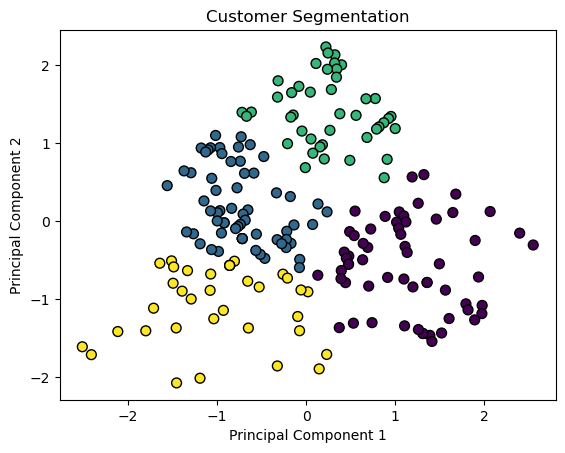

In [14]:
# Create a scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_data['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


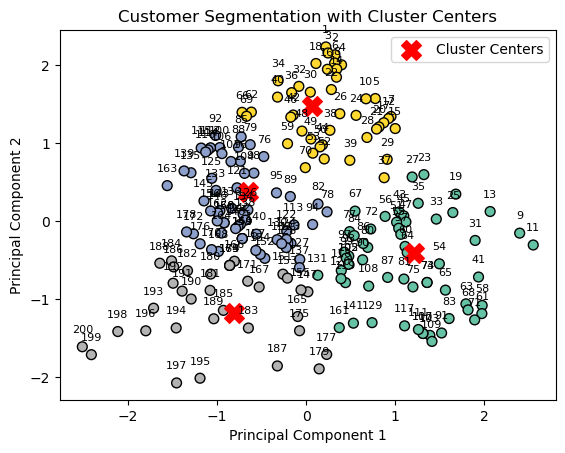

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette for better visibility of clusters
custom_palette = sns.color_palette("Set2", as_cmap=True)

# Create a scatter plot with cluster centers
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_data['Cluster'], cmap=custom_palette, edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Annotate points with customer IDs or any relevant information
for i, customer_id in enumerate(customer_data['CustomerID']):
    plt.annotate(customer_id, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.title('Customer Segmentation with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [15]:
# Explore cluster characteristics
cluster_means = customer_data.groupby('Cluster').mean()
print(cluster_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         74.750000  55.716667           49.916667               40.516667
1        129.016129  29.838710           70.467742               56.677419
2         30.325581  27.511628           29.697674               59.790698
3        180.342857  39.828571           99.171429               43.542857
